<a href="https://colab.research.google.com/github/Sadikshya-dhakal/AI/blob/main/DS_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**NumPy and Pandas** are used for numerical operations and data handling.

**Matplotlib and Seaborn** are used for data visualization.

**Scikit-learn** modules are used to load the breast cancer dataset, split data into training and testing sets, build a Decision Tree classifier, visualize the tree, and evaluate the model using metrics such as accuracy, precision, recall, F1-score, confusion matrix, and ROC-AUC curve.


In [2]:
#1.Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)



This code loads the **Breast Cancer dataset**, separates features (`X`) and target labels (`y`), and displays the dataset shape and class distribution. The data is then split into **training (75%)** and **testing (25%)** sets using stratified sampling to preserve class balance.

A **CART Decision Tree Classifier** is built using the **Gini Index** with controlled depth and minimum samples to prevent overfitting. The model is trained on the training data, and predictions are generated for both training and testing sets. Additionally, predicted probabilities for the positive class are calculated for performance evaluation such as ROC-AUC analysis.


In [3]:
# 2. Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")

print("Dataset Shape:", X.shape)
print("\nTarget Distribution:")
print(y.value_counts())

Dataset Shape: (569, 30)

Target Distribution:
Target
1    357
0    212
Name: count, dtype: int64


In [4]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [5]:
# 4. Build CART Decision Tree Classifier
cart_model = DecisionTreeClassifier(
    criterion="gini",     # CART uses Gini Index
    max_depth=4,
    min_samples_split=10,
    random_state=42
)

In [6]:
# 5. Train Model
cart_model.fit(X_train, y_train)

# 6. Predictions
y_train_pred = cart_model.predict(X_train)
y_test_pred = cart_model.predict(X_test)
y_test_prob = cart_model.predict_proba(X_test)[:, 1]

In [7]:
# 7. Evaluation Metrics
print("\n===== TRAINING PERFORMANCE =====")
print("Accuracy:", accuracy_score(y_train, y_train_pred))

print("\n===== TEST PERFORMANCE =====")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_test_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred, target_names=data.target_names))


===== TRAINING PERFORMANCE =====
Accuracy: 0.9835680751173709

===== TEST PERFORMANCE =====
Accuracy: 0.9370629370629371
Precision: 0.945054945054945
Recall: 0.9555555555555556
F1 Score: 0.9502762430939227
ROC AUC Score: 0.9371069182389938

Classification Report:

              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        53
      benign       0.95      0.96      0.95        90

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



Confusion Matrix

The confusion matrix shows how well the model classifies the test data by comparing actual labels with predicted labels.

True Positives (TP): Correctly predicted positive cases

True Negatives (TN): Correctly predicted negative cases

False Positives (FP): Incorrectly predicted positives

False Negatives (FN): Incorrectly predicted negatives

A heatmap is used to visualize these values clearly, helping to understand where the model makes correct predictions and where it makes mistakes.

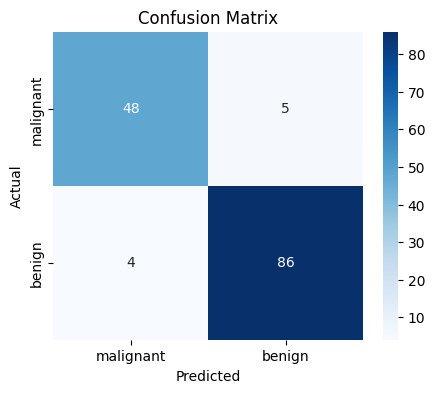

In [8]:
# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

ROC Curve

The ROC (Receiver Operating Characteristic) curve evaluates the model’s ability to distinguish between classes at different threshold values.

False Positive Rate (FPR): Probability of incorrectly classifying a negative case as positive

True Positive Rate (TPR): Probability of correctly identifying a positive case

The AUC (Area Under the Curve) value summarizes performance:

AUC close to 1.0 → excellent classifier

AUC close to 0.5 → poor classifier (random guessing)

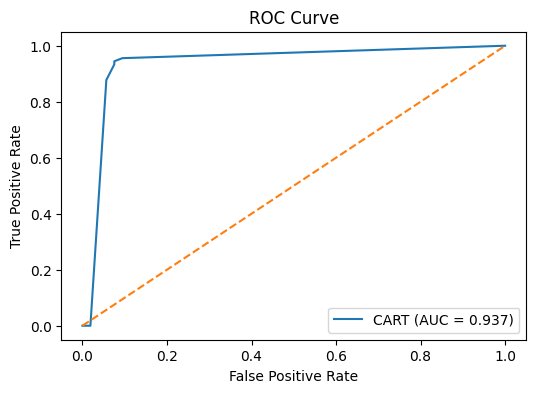

In [9]:
# 9. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label="CART (AUC = {:.3f})".format(roc_auc_score(y_test, y_test_prob)))
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Decision Tree Visualization

The decision tree plot shows how the CART model makes decisions by splitting data based on feature values.

Each node represents a decision rule

Branches show the outcome of the rule

Leaf nodes represent the final predicted class

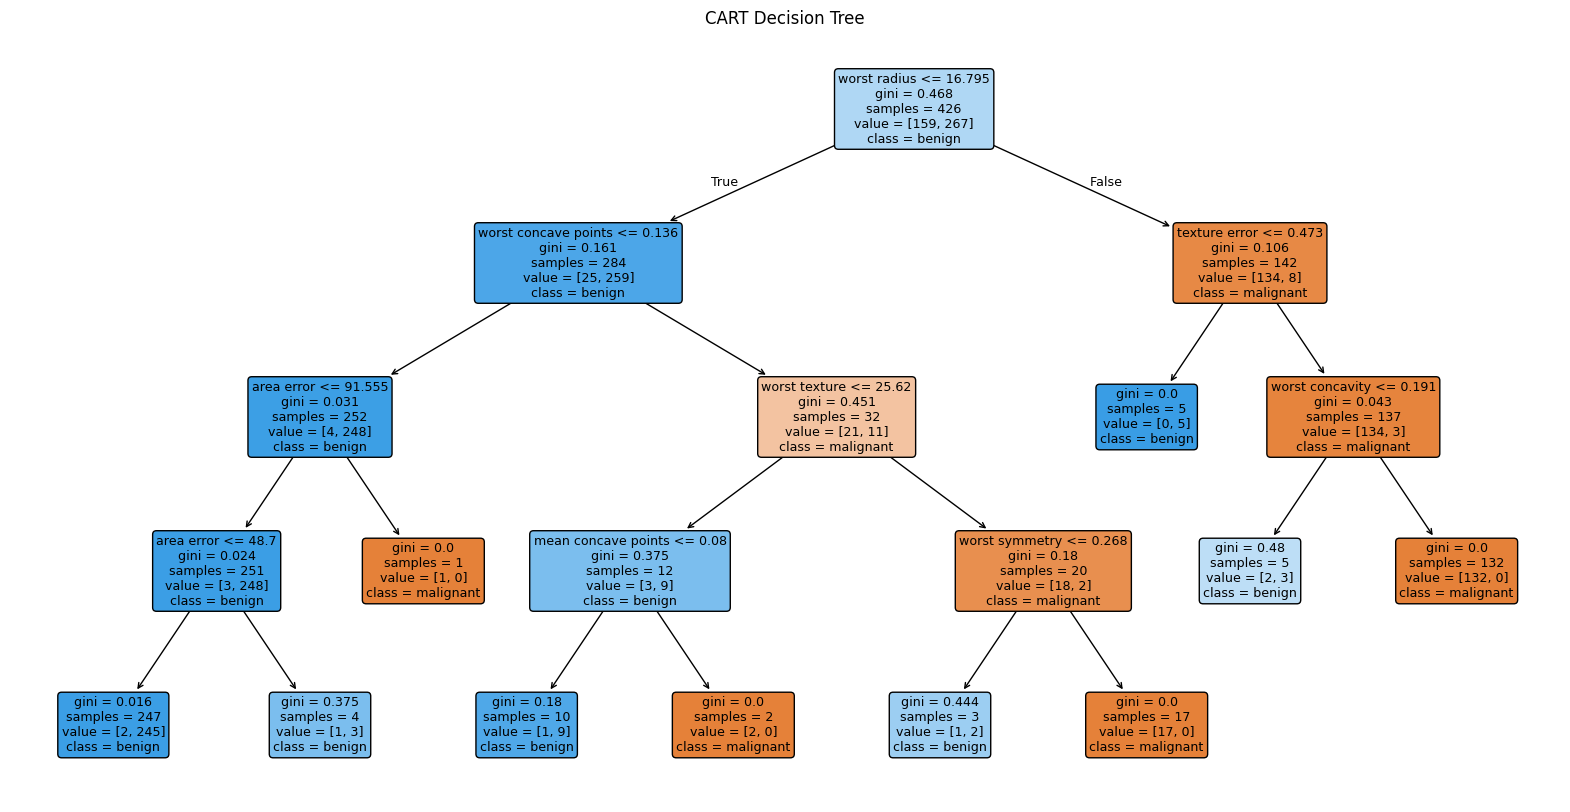

In [10]:
# 10. Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(
    cart_model,
    feature_names=X.columns,
    class_names=data.target_names,
    filled=True,
    rounded=True
)
plt.title("CART Decision Tree")
plt.show()



The CART Decision Tree model performed well on the Breast Cancer dataset, showing good accuracy and class separation. The confusion matrix and ROC–AUC results confirmed reliable predictions, while the decision tree visualization made the model easy to understand and interpret. Overall, the model is effective and suitable for classification tasks that require both accuracy and interpretability.
